# Clustering with $k$-means and Gaussian mixtures

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

## Data generation

In [3]:
no_clusters = 3
no_samples = 200
X_unscaled, y = make_blobs(n_samples=no_samples,
                           n_features=2,
                           centers=no_clusters)
print('Feature shape:', X_unscaled.shape)
print('Target shape:', y.shape)

Feature shape: (200, 2)
Target shape: (200,)


In [4]:
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X_unscaled)

<IPython.core.display.Javascript object>


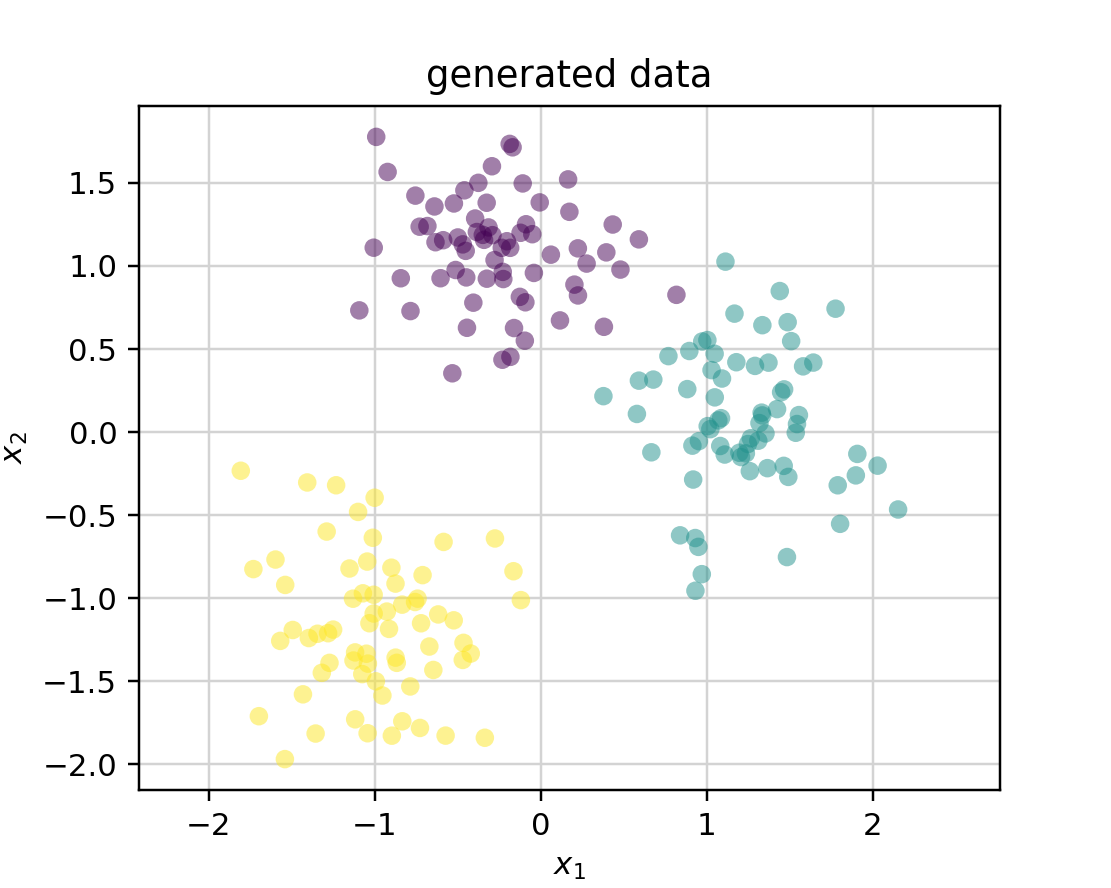

In [5]:
fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(X[:,0], X[:,1], c=y, alpha=0.5, edgecolors='none')
ax.set_title('generated data')
ax.set_aspect('equal', adjustable='datalim')
ax.set(xlabel='$x_1$', ylabel='$x_2$')
ax.grid(b=True, which='both', color='lightgray', linestyle='-')
ax.set_axisbelow(True)
fig.show()

## $k$-means clustering

In [6]:
max_components = 10
avg_silhouette_scores = []
for no_components in range(2, max_components+1):
    km_model = KMeans(n_clusters=no_components)
    km_model.fit(X)
    y_pred = km_model.predict(X)
    avg_silhouette_scores.append(silhouette_score(X, y_pred))

<IPython.core.display.Javascript object>


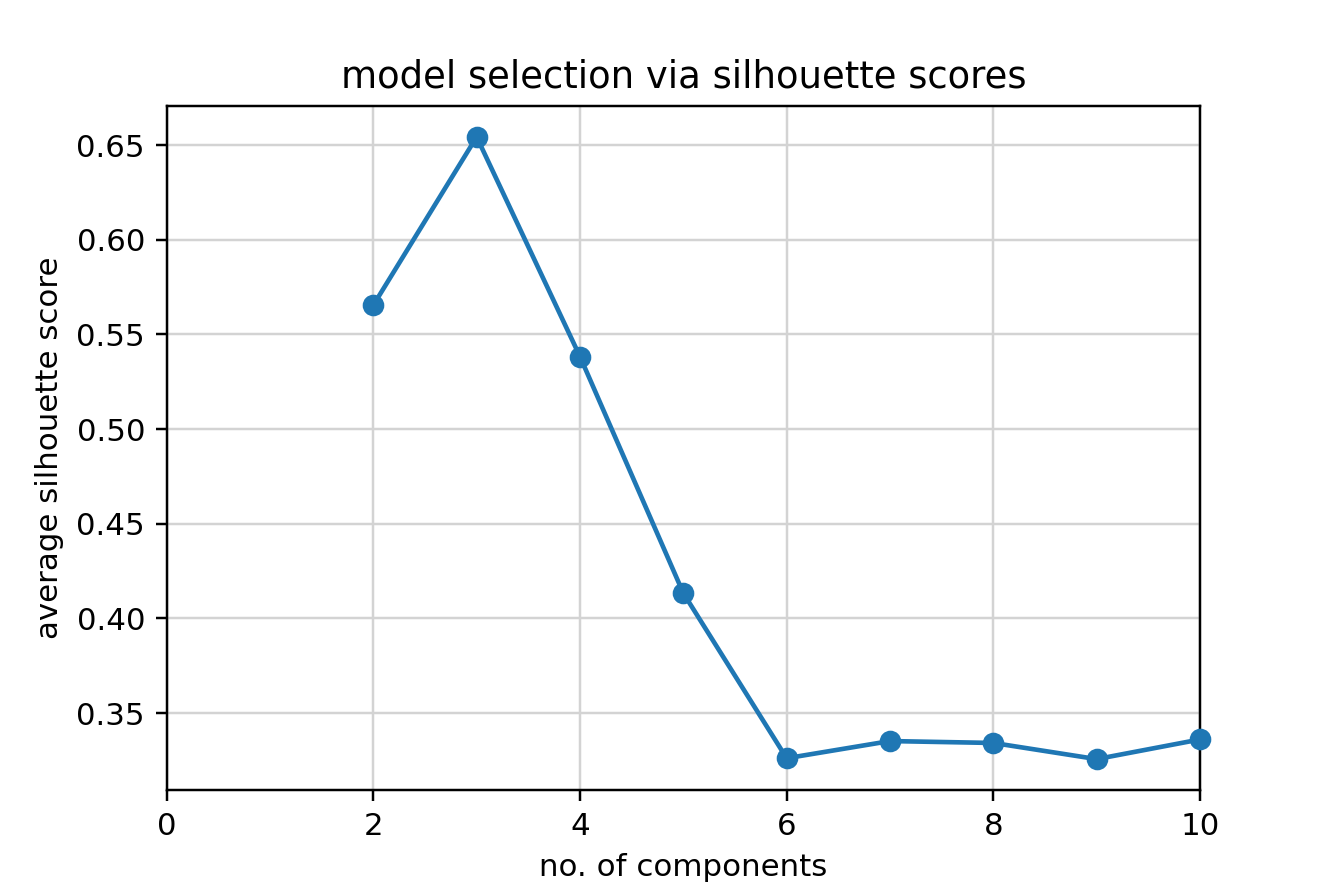

In [7]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(np.arange(2,max_components+1), avg_silhouette_scores, marker='o', clip_on=False, zorder=3)
ax.set_title('model selection via silhouette scores')
ax.set(xlabel='no. of components', ylabel='average silhouette score', xlim=(0,max_components))
ax.grid(b=True, which='both', color='lightgray', linestyle='-')
ax.set_axisbelow(True)
fig.show()

In [8]:
no_components = np.argmax(avg_silhouette_scores) + 2
print('The model with {} clusters has been selected.'.format(no_components))

The model with 3 clusters has been selected.


In [9]:
km_model = KMeans(n_clusters=no_components)
y_pred = km_model.fit_predict(X)

<IPython.core.display.Javascript object>


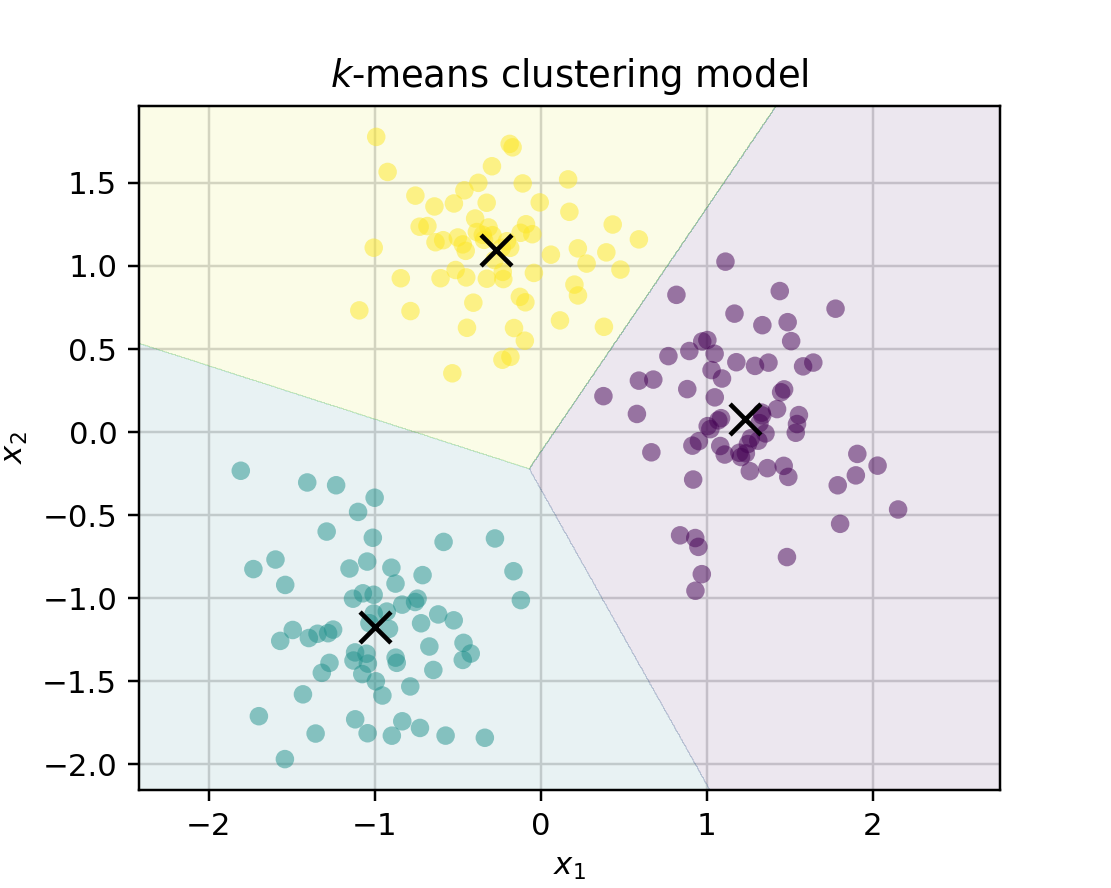

In [10]:
fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(X[:,0], X[:,1], c=y_pred, cmap='viridis', alpha=0.5, edgecolors='none', zorder=2)
ax.scatter(km_model.cluster_centers_[:,0], km_model.cluster_centers_[:,1], s=100, c='k', marker='x', zorder=3)
ax.set_aspect('equal', adjustable='datalim')
ax.apply_aspect()
X_values, Y_values = np.meshgrid(np.linspace(*ax.get_xlim(), 1001), np.linspace(*ax.get_ylim(), 1001))
Z_values = km_model.predict(np.stack((X_values.ravel(), Y_values.ravel()), axis=1)).reshape(X_values.shape)
ax.contourf(X_values, Y_values, Z_values, cmap='viridis', alpha=0.1, zorder=1)
ax.set_title('$k$-means clustering model')
ax.set(xlabel='$x_1$', ylabel='$x_2$')
ax.grid(b=True, which='both', color='lightgray', linestyle='-')
ax.set_axisbelow(True)
fig.show()

## Gaussian mixture fitting

In [11]:
max_components = 10
aics = []
bics = []
for no_components in range(1,max_components+1):
    gm_model = GaussianMixture(n_components=no_components)
    gm_model.fit(X)
    aics.append(gm_model.aic(X))
    bics.append(gm_model.bic(X))

<IPython.core.display.Javascript object>


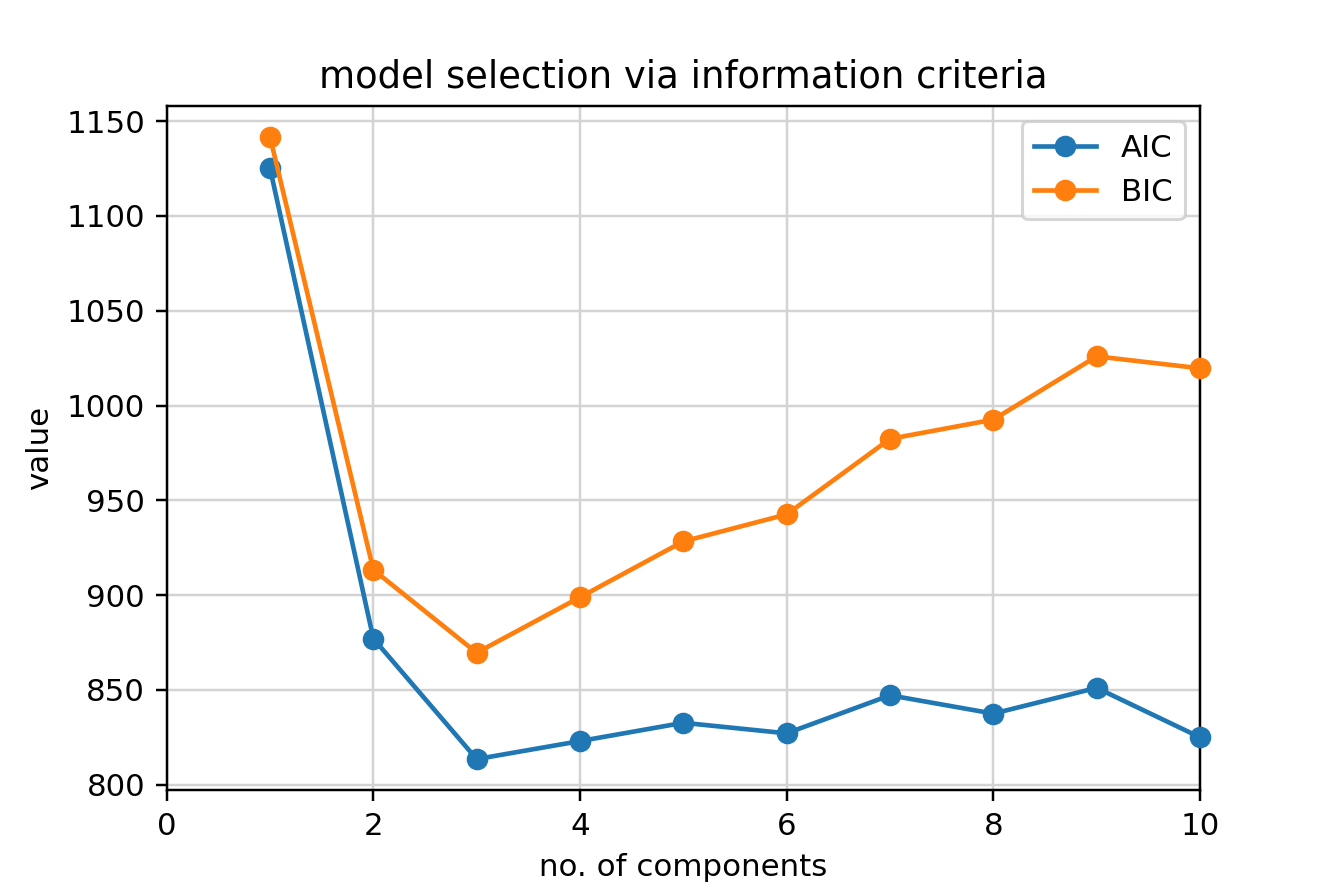

In [12]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(np.arange(1,max_components+1), aics, marker='o', label='AIC', clip_on=False, zorder=3)
ax.plot(np.arange(1,max_components+1), bics, marker='o', label='BIC', clip_on=False, zorder=3)
ax.set_title('model selection via information criteria')
ax.set(xlabel='no. of components', ylabel='value', xlim=(0,max_components))
ax.legend()
ax.grid(b=True, which='both', color='lightgray', linestyle='-')
ax.set_axisbelow(True)
fig.show()

In [13]:
no_components = np.argmin(bics) + 1
print('The model with {} components has been selected.'.format(no_components))

The model with 3 components has been selected.


In [14]:
gm_model = GaussianMixture(n_components=no_components)
y_pred = gm_model.fit_predict(X)

<IPython.core.display.Javascript object>


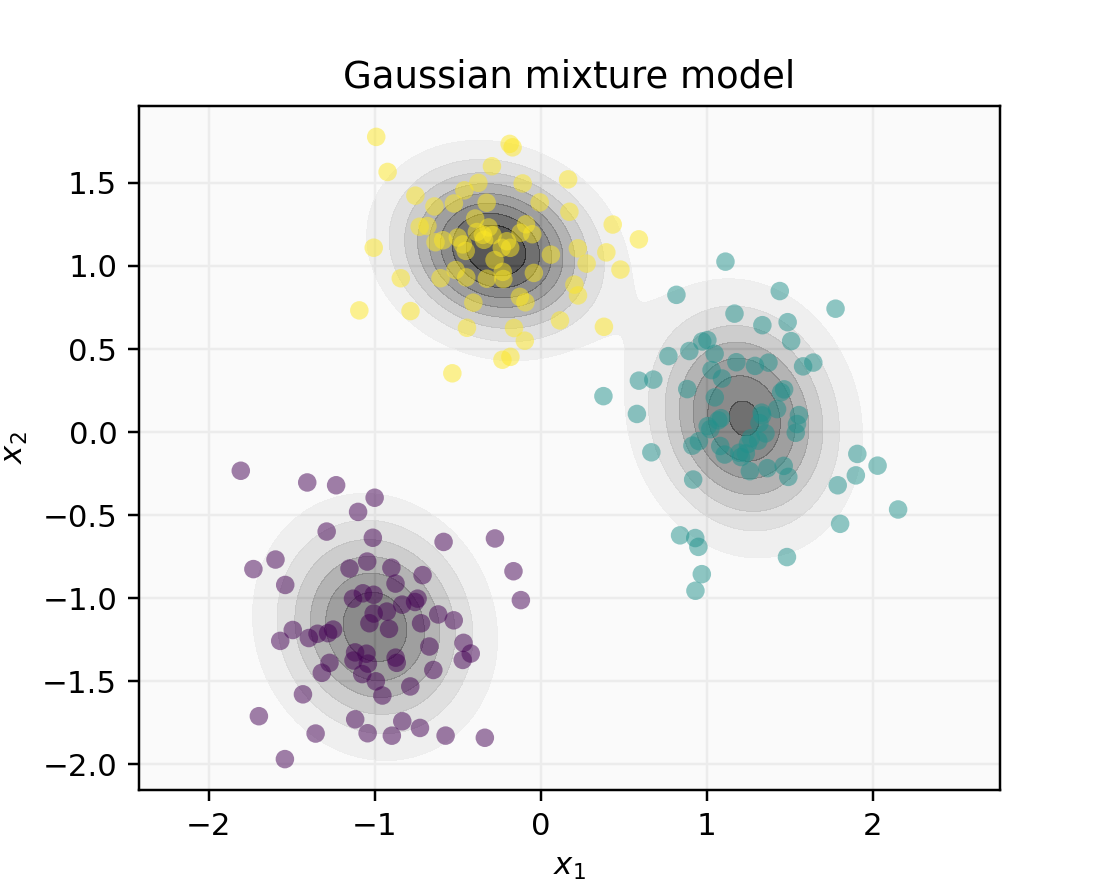

In [15]:
fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(X[:,0], X[:,1], c=y_pred, cmap='viridis', alpha=0.5, edgecolors='none', zorder=2)
ax.set_aspect('equal', adjustable='datalim')
ax.apply_aspect()
X_values, Y_values = np.meshgrid(np.linspace(*ax.get_xlim(), 1001), np.linspace(*ax.get_ylim(), 1001))
Z_values = gm_model.score_samples(np.stack((X_values.ravel(), Y_values.ravel()), axis=1)).reshape(X_values.shape)
ax.contourf(X_values, Y_values, np.exp(Z_values), levels=10, cmap='Greys', alpha=0.7, zorder=1)
ax.set_title('Gaussian mixture model')
ax.set(xlabel='$x_1$', ylabel='$x_2$', )
ax.grid(b=True, which='both', color='lightgray', linestyle='-')
ax.set_axisbelow(True)
fig.show()